<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Typical Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool 

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 

Target: 
======

In this Implementation , I have

1. Network structure is C1 C2 c3 P1 C3 C4 C5 c6 P2 C7 C8 C9 GAP C10
2. NO of parameters is less than 50,000 (41,456)
3. 3 Layers  where the previous image added to the filtered output
4. Batch size 128 
5. Layer Normalization 



Result: 
======
1. Observed Train accuracy: 70.09%
2. Validation accuracy:74.30%
3. Number of parameters: 41,456


Analysis: 
========

1. The Validation accuracy improved even with less parameters but slightly less than the Group Normalization implementation
2. The steady increase in the validation accuracy is due to the addition of layers

In [2]:
from model import model2 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (3, 32, 32)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         LayerNorm-3           [-1, 16, 32, 32]               0
         Dropout2d-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         LayerNorm-7           [-1, 16, 32, 32]               0
         Dropout2d-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]             512
             ReLU-10           [-1, 32, 32, 32]               0
        LayerNorm-11           [-1, 32, 32, 32]               0
        MaxPool2d-12           [-1, 32, 16, 16]               0
           Conv2d-13           [-1, 16, 16, 16]           4,608
             ReLU-14           [-1, 16,

G:\ERA_S8\model.py:256: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize - Yes that's the only thing i am going to apply on the data for now


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader(batch_size, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Files already downloaded and verified


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [6]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 20):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    #scheduler.step()

Currently Executing Epoch: 1


Loss=1.677656888961792 Batch_id=390 Accuracy=29.43: 100%|████████████████████████████| 391/391 [02:11<00:00,  2.97it/s]



Test set: Average loss: 1.6121, Accuracy: 3947/10000 (39.47%)

Currently Executing Epoch: 2


Loss=1.413262128829956 Batch_id=390 Accuracy=43.37: 100%|████████████████████████████| 391/391 [02:24<00:00,  2.70it/s]



Test set: Average loss: 1.3520, Accuracy: 5060/10000 (50.60%)

Currently Executing Epoch: 3


Loss=1.3110072612762451 Batch_id=390 Accuracy=50.34: 100%|███████████████████████████| 391/391 [02:25<00:00,  2.69it/s]



Test set: Average loss: 1.1714, Accuracy: 5771/10000 (57.71%)

Currently Executing Epoch: 4


Loss=1.1463141441345215 Batch_id=390 Accuracy=54.74: 100%|███████████████████████████| 391/391 [02:26<00:00,  2.67it/s]



Test set: Average loss: 1.0711, Accuracy: 6158/10000 (61.58%)

Currently Executing Epoch: 5


Loss=1.2593916654586792 Batch_id=390 Accuracy=57.99: 100%|███████████████████████████| 391/391 [02:24<00:00,  2.71it/s]



Test set: Average loss: 1.0394, Accuracy: 6319/10000 (63.19%)

Currently Executing Epoch: 6


Loss=1.01600182056427 Batch_id=390 Accuracy=59.86: 100%|█████████████████████████████| 391/391 [02:34<00:00,  2.53it/s]



Test set: Average loss: 0.9694, Accuracy: 6536/10000 (65.36%)

Currently Executing Epoch: 7


Loss=1.006348729133606 Batch_id=390 Accuracy=61.84: 100%|████████████████████████████| 391/391 [02:41<00:00,  2.42it/s]



Test set: Average loss: 0.9562, Accuracy: 6657/10000 (66.57%)

Currently Executing Epoch: 8


Loss=1.110034704208374 Batch_id=390 Accuracy=63.00: 100%|████████████████████████████| 391/391 [02:34<00:00,  2.53it/s]



Test set: Average loss: 0.8864, Accuracy: 6828/10000 (68.28%)

Currently Executing Epoch: 9


Loss=1.3661330938339233 Batch_id=390 Accuracy=64.02: 100%|███████████████████████████| 391/391 [02:28<00:00,  2.63it/s]



Test set: Average loss: 0.8702, Accuracy: 6929/10000 (69.29%)

Currently Executing Epoch: 10


Loss=0.8342490196228027 Batch_id=390 Accuracy=65.26: 100%|███████████████████████████| 391/391 [02:25<00:00,  2.68it/s]



Test set: Average loss: 0.8678, Accuracy: 6967/10000 (69.67%)

Currently Executing Epoch: 11


Loss=0.9244621992111206 Batch_id=390 Accuracy=66.00: 100%|███████████████████████████| 391/391 [02:24<00:00,  2.70it/s]



Test set: Average loss: 0.8216, Accuracy: 7126/10000 (71.26%)

Currently Executing Epoch: 12


Loss=1.0023912191390991 Batch_id=390 Accuracy=66.74: 100%|███████████████████████████| 391/391 [02:24<00:00,  2.70it/s]



Test set: Average loss: 0.8070, Accuracy: 7162/10000 (71.62%)

Currently Executing Epoch: 13


Loss=0.9121990203857422 Batch_id=390 Accuracy=67.41: 100%|███████████████████████████| 391/391 [02:27<00:00,  2.65it/s]



Test set: Average loss: 0.7840, Accuracy: 7265/10000 (72.65%)

Currently Executing Epoch: 14


Loss=1.0979182720184326 Batch_id=390 Accuracy=67.56: 100%|███████████████████████████| 391/391 [02:25<00:00,  2.69it/s]



Test set: Average loss: 0.8150, Accuracy: 7132/10000 (71.32%)

Currently Executing Epoch: 15


Loss=0.7497358322143555 Batch_id=390 Accuracy=68.65: 100%|███████████████████████████| 391/391 [02:26<00:00,  2.68it/s]



Test set: Average loss: 0.7672, Accuracy: 7322/10000 (73.22%)

Currently Executing Epoch: 16


Loss=0.8006128072738647 Batch_id=390 Accuracy=68.90: 100%|███████████████████████████| 391/391 [02:24<00:00,  2.71it/s]



Test set: Average loss: 0.7709, Accuracy: 7321/10000 (73.21%)

Currently Executing Epoch: 17


Loss=0.808685302734375 Batch_id=390 Accuracy=69.55: 100%|████████████████████████████| 391/391 [02:24<00:00,  2.70it/s]



Test set: Average loss: 0.7649, Accuracy: 7361/10000 (73.61%)

Currently Executing Epoch: 18


Loss=0.9586256146430969 Batch_id=390 Accuracy=69.83: 100%|███████████████████████████| 391/391 [02:38<00:00,  2.47it/s]



Test set: Average loss: 0.7427, Accuracy: 7442/10000 (74.42%)

Currently Executing Epoch: 19


Loss=0.8767277598381042 Batch_id=390 Accuracy=70.09: 100%|███████████████████████████| 391/391 [02:32<00:00,  2.57it/s]



Test set: Average loss: 0.7384, Accuracy: 7430/10000 (74.30%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

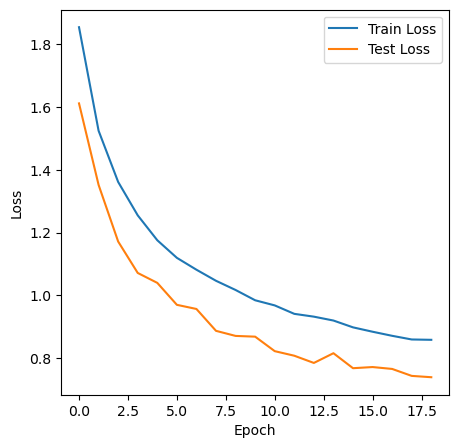

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

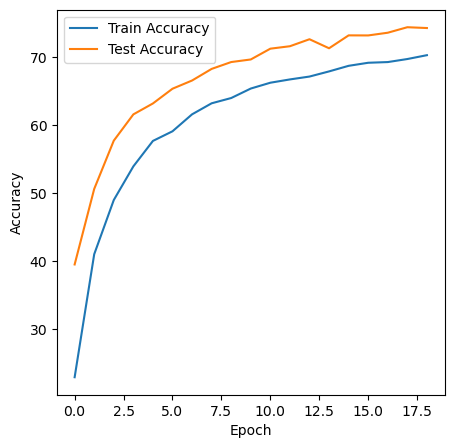

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
